## Credit EDA Assignment

In [195]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [196]:
import warnings
warnings.filterwarnings('ignore')

In [197]:
appdf = pd.read_csv("/content/application_data.csv")
appdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
appdf.shape

(307511, 122)

In [199]:
#Columns having null values >30%
nullcol=appdf.isnull().sum()
nullcol=nullcol[nullcol.values>(0.3*len(nullcol))]
nullcol = list(nullcol[nullcol.values>=0.3].index)
#dropping columns having null values >30%
appdf.drop(labels=nullcol,axis=1,inplace=True)

In [200]:
appdf.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [201]:
appdf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG

In [202]:
#Removing unwanted columns
appdf.drop(labels=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [203]:
appdf.shape

(307511, 28)

**Missing values**



In [204]:
appdf.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
dtype: int64

In [205]:
#Dropping the records having null values as the count is insignificant
appdf= appdf[~appdf.AMT_ANNUITY.isnull()]

In [206]:
appdf.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64

In [207]:
appdf.shape

(307499, 28)

In [208]:
appdf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

**Calculating imbalance ratio**

In [209]:
#dividing into 2 datasets one having clients with payment difficulties (target =1) and other having clients with no payment difficulties (target=0)

app_tar0=appdf.loc[appdf["TARGET"]==0]
app_tar1=appdf.loc[appdf["TARGET"]==1]

In [210]:
#Calculating imbalance ratio in the dataset
imbalance_ratio=len(app_tar0)/len(app_tar1)
imbalance_ratio

11.386666666666667

Clients having no payment difficulties is much higher than clients having difficulties (11.38 : 1)

**Deriving insights**

Deriving insights coloumnwise (inapproprite values, outliers... are handled based on the need while analysis)

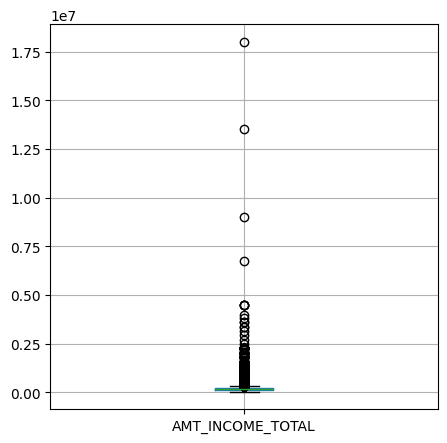

In [215]:
#Univariate analysis for AMT_INCOME_TOTAL on app_tar0
plt.figure(figsize=(5,5))
app_tar0.boxplot(column=['AMT_INCOME_TOTAL'])
plt.show()

In [216]:
#since we have ouliers in the AMT_INCOME_TOTAL
app_tar0.AMT_INCOME_TOTAL.quantile([0.25, 0.5, 0.7, 0.9, 0.95, 0.99])

0.25    112500.0
0.50    148500.0
0.70    185400.0
0.90    270000.0
0.95    337500.0
0.99    486000.0
Name: AMT_INCOME_TOTAL, dtype: float64

- Few people have very high salary compared to others
- Considering these values in the analysis as they may be useful for getting insights

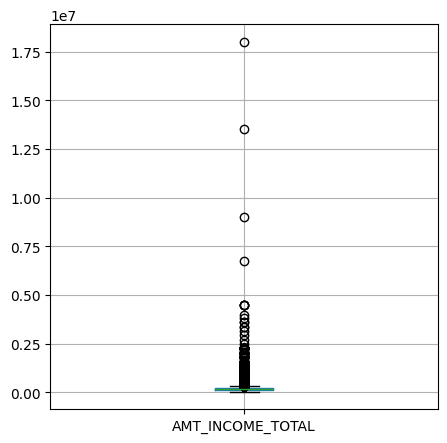

In [219]:
#Univariate analysis on AMT_INCOME_TOTAL for app_tar1
plt.figure(figsize=(5,5))
app_tar0.boxplot(column=['AMT_INCOME_TOTAL'])
plt.show()

- Few people have very high salary compared to others and till have difficulties for payment.
- Considering these values in the analysis as they may be useful for getting insights

In [220]:
app_tar0.CODE_GENDER.value_counts()

CODE_GENDER
F      188270
M       94400
XNA         4
Name: count, dtype: int64

In [221]:
#Considering XNA as inappriate value, dropping those value from dataset
app_tar0=app_tar0[app_tar0.CODE_GENDER!='XNA']

In [222]:
app_tar0.CODE_GENDER.value_counts()

CODE_GENDER
F    188270
M     94400
Name: count, dtype: int64

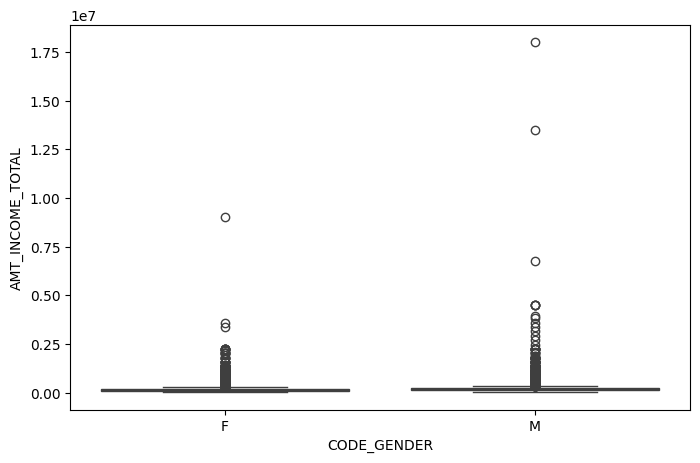

In [224]:
#AMT_INCOME_TOTAL x CODE_GENDER
plt.figure(figsize=(8,5))
app_tar0.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].median()
sns.boxplot(data=app_tar0,x="CODE_GENDER", y="AMT_INCOME_TOTAL")
plt.show()


- few people have very high income compared to others in which count of male is morethan female.


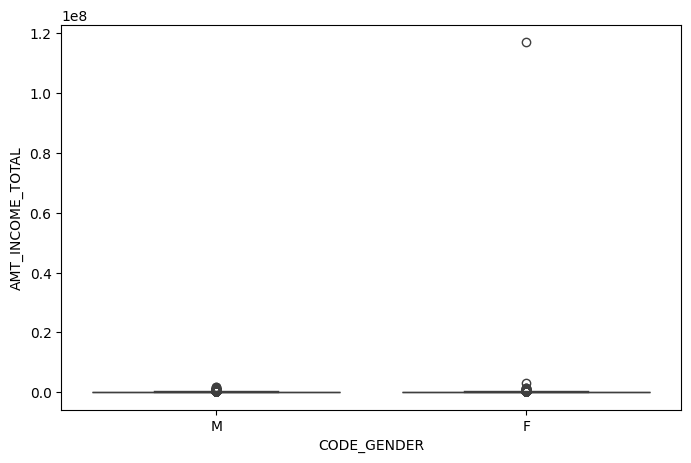

In [226]:
plt.figure(figsize=(8,5))
app_tar1.groupby("CODE_GENDER")["AMT_INCOME_TOTAL"].median()
sns.boxplot(data=app_tar1,x="CODE_GENDER", y="AMT_INCOME_TOTAL")
plt.show()

In [227]:
app_tar1['AMT_INCOME_TOTAL'].max()

117000000.0

- In target =1, almost everyone's income is nearby, except for 1.

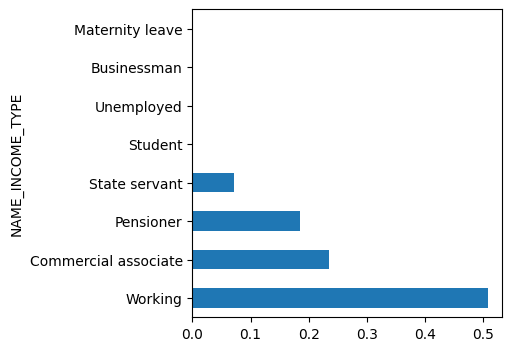

In [230]:
#Univariate analysis of NAME_INCOME_TYPE
plt.figure(figsize=(4,4))
app_tar0.NAME_INCOME_TYPE.value_counts(normalize= True).plot.barh()
plt.show()

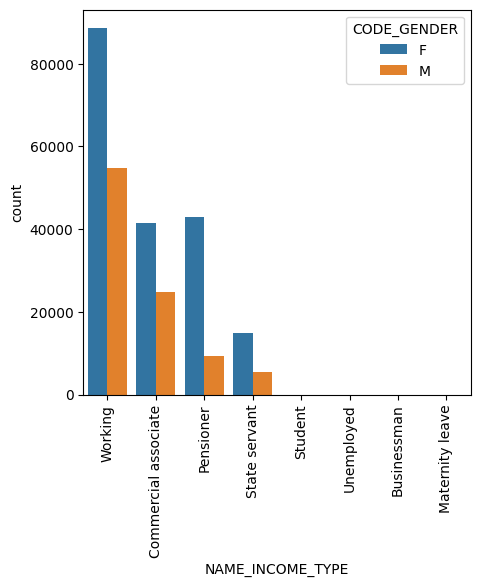

In [232]:
#NAME_INCOME_TYPE x CODE_GENDER - app_tar0
plt.figure(figsize=(5,5))
sns.countplot(data = app_tar0, x= 'NAME_INCOME_TYPE', order=app_tar0['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER')
plt.xticks(rotation=90)
plt.show()

- Income type Working, Commercial associate, Pensioner are more like to have no payment difficulties.
  - In these three income type, Female have no payment difficuilties compared to men

In [233]:
app_tar0['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 143541
Commercial associate     66253
Pensioner                52380
State servant            20451
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: count, dtype: int64

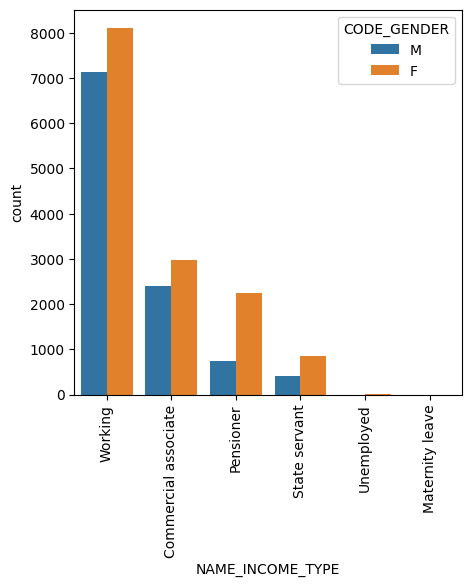

In [235]:
#NAME_INCOME_TYPE x CODE_GENDER - app_tar1
plt.figure(figsize=(5,5))
sns.countplot(data = app_tar1, x= 'NAME_INCOME_TYPE', order=app_tar1['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER')
plt.xticks(rotation=90)
plt.show()

- Income type Working, Commercial associate, Pensioner are more like to have payment difficulties.
  - In these three income type, male have payment difficuilties compared to female

In [236]:
app_tar1['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: count, dtype: int64

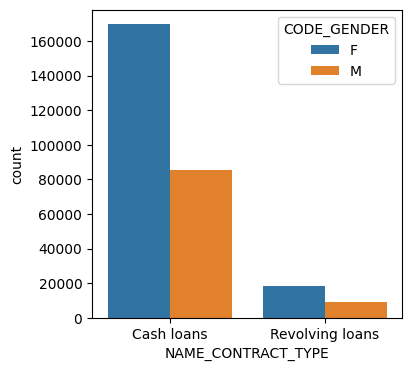

In [238]:
#NAME_CONTRACT_TYPE x CODE_GENDER - app_tar0
plt.figure(figsize=(4,4))
sns.countplot(data = app_tar0, x= 'NAME_CONTRACT_TYPE', order=app_tar0['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER')
plt.show()

- Clients with contract type Cash loans are more likely to have no payment difficulities.
  - In Cash loans, female are more likely to have no payment difficulities.

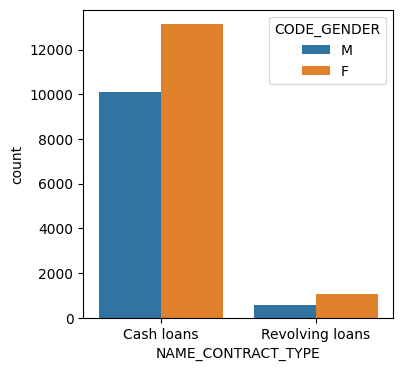

In [240]:
#NAME_CONTRACT_TYPE x CODE_GENDER - app_tar1
plt.figure(figsize=(4,4))
sns.countplot(data = app_tar1, x= 'NAME_CONTRACT_TYPE', order=app_tar1['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER')
plt.show()

- Clients with contract type Cash loans are more likely to have payment difficulities.
  - In Cash loans, female are more likely to have payment difficulities.

(This could have happened because of imbalance data for target variable).

In [241]:
#ORGANIZATION_TYPE
appdf['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10553
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [242]:
#55374 records in dataset has ORGANIZATION_TYPE null
#Since we cant get data for these values from external sources or assume values with some standard values (as the %age is very high) drop these records from dataset
appdf=appdf.drop(appdf.loc[appdf['ORGANIZATION_TYPE']=='XNA'].index)
app_tar0=app_tar0.drop(app_tar0.loc[app_tar0['ORGANIZATION_TYPE']=='XNA'].index)
app_tar1=app_tar1.drop(app_tar1.loc[app_tar1['ORGANIZATION_TYPE']=='XNA'].index)

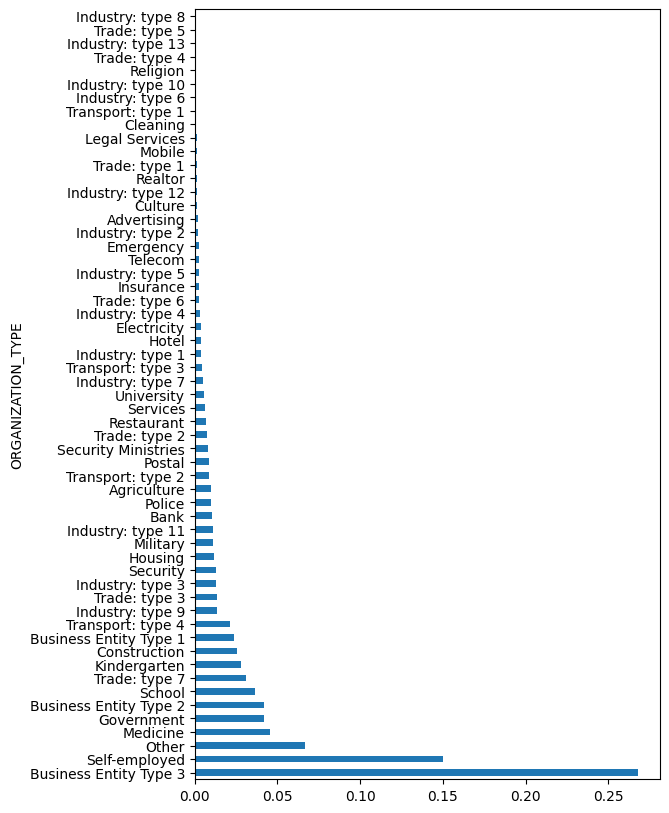

In [248]:
#Univariate analysis on ORGANIZATION_TYPE - app_tar0
plt.figure(figsize=(6,10))
app_tar0.ORGANIZATION_TYPE.value_counts(normalize= True).plot.barh()
plt.rcParams["figure.figsize"] = (6, 6)
plt.show()

- ORGANIZATION_TYPE = Business Entity Type 3 are more likely to apply for loan and also more likely to have no payment difficulties.

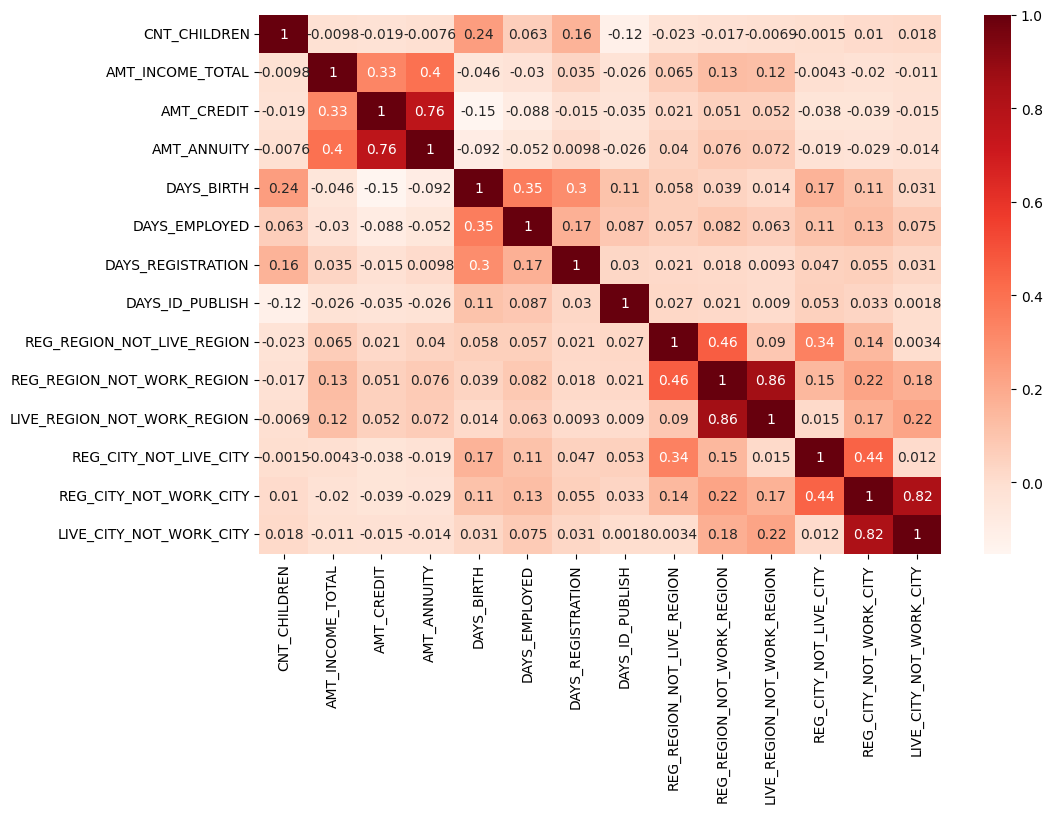

In [254]:
##creating heatmap using correlation matrix for target=0
plt.figure(figsize=(11,7))
sns.heatmap( app_tar0[["CNT_CHILDREN", "AMT_INCOME_TOTAL",
       "AMT_CREDIT", "AMT_ANNUITY","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH",
       "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
       "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
       "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]].corr(), annot= True, cmap= "Reds")
plt.show()

- AMT_CREDIT is inversely proportional to DAYS_BIRTH, CNT_CHILDREN, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH
- AMT_CREDIT is highly correlated with AMT_ANNUIY.
- AMT_ANNUIY is directly proportional to AMT_INCOME_TOTAL.
- REG_REGION_NOT_LIVE_REGION is directly proportional to REG_REGION_NOT_WORK_REGION.
- LIVE_REGION_NOT_WORK_REGION is highly correlated to REG_REGION_NOT_WORK_REGION.
- LIVE_CITY_NOT_WORK_CITY is highly correlated to REG_CITY_NOT_WORK_CITY

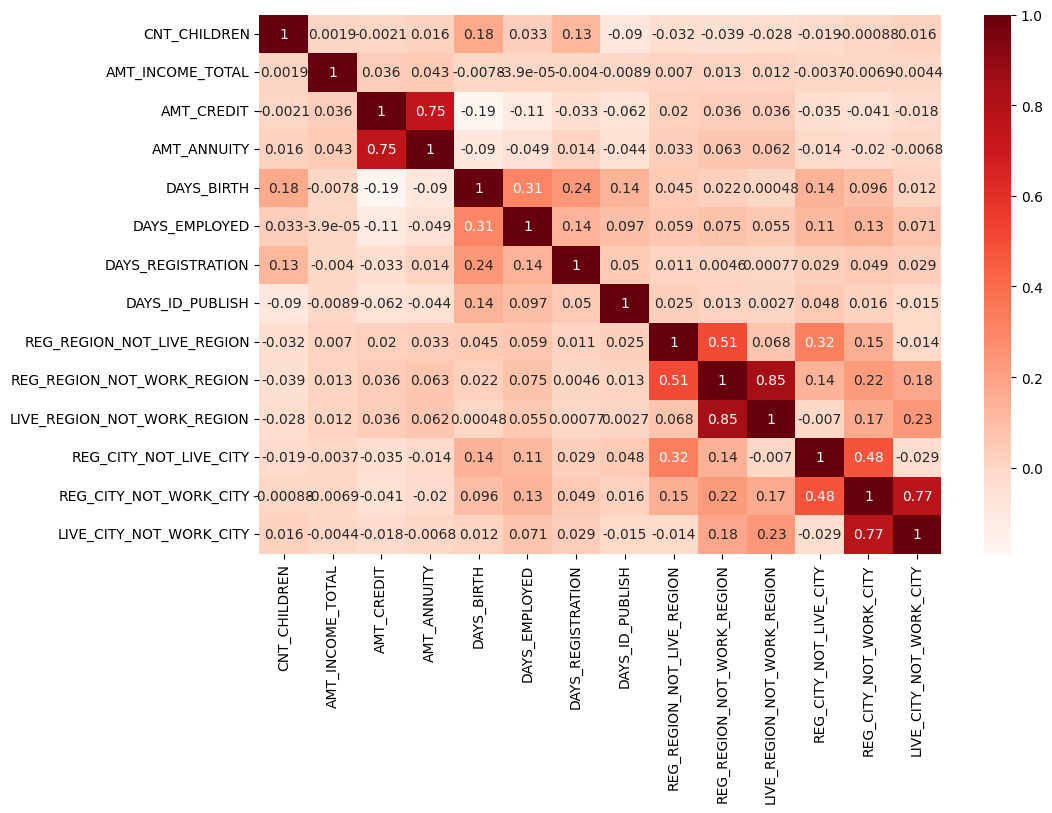

In [256]:
##creating heatmap using correlation matrix for target=0
plt.figure(figsize=(11,7))
sns.heatmap( app_tar1[["CNT_CHILDREN", "AMT_INCOME_TOTAL",
       "AMT_CREDIT", "AMT_ANNUITY","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH",
       "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
       "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
       "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]].corr(), annot= True, cmap= "Reds")
plt.show()

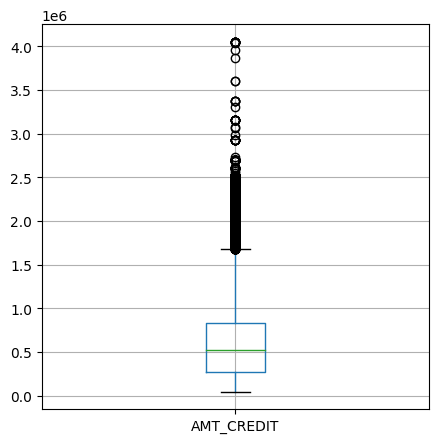

In [257]:
#Univariate analysis for AMT_CREDIT - app_tar0
app_tar0.boxplot(column=['AMT_CREDIT'], figsize=(5,5))
plt.show()

- AMT_CREDIT has few outliers with target=0.



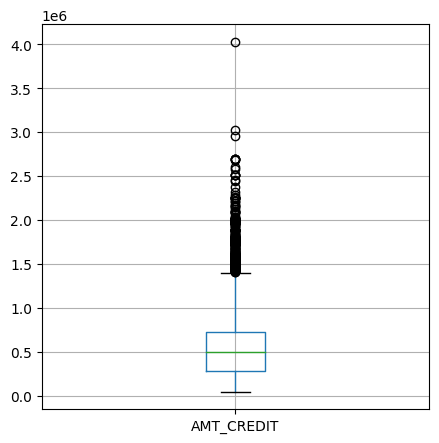

In [258]:
#Univariate analysis for AMT_CREDIT - app_tar1
app_tar1.boxplot(column=['AMT_CREDIT'], figsize=(5,5))
plt.show()

- AMT_CREDIT has few outliers with target=1.

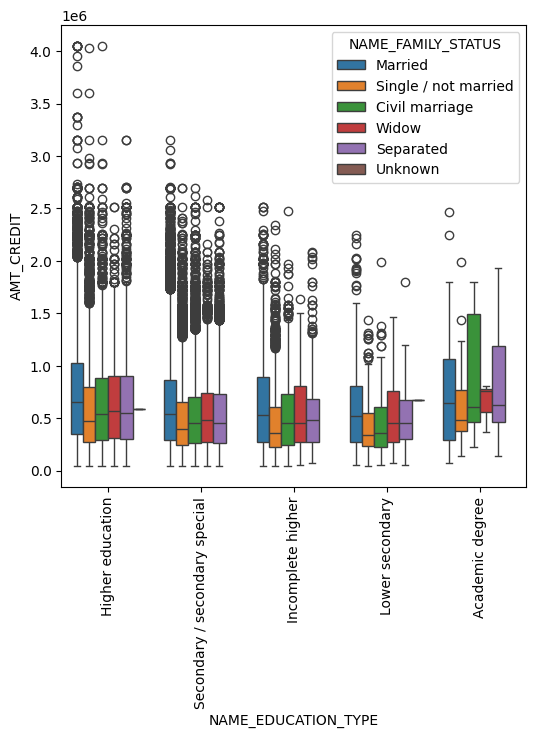

In [259]:
#AMT_CREDIT x NAME_EDUCATION_TYPE x NAME_FAMILY_STATUS - app_tar0
sns.boxplot(data =app_tar0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.rcParams["figure.figsize"] = (6, 6)
plt.xticks(rotation=90)
plt.show()

- Clients wit Higher education and Married or Civil marriage or seperated has more AMT_CREDIT.
- Clints with Academic degree and Married or Civil marriage has more AMT_CREDIT.

Considering previous_application.csv

In [260]:
prevdf = pd.read_csv("/content/previous_application.csv")
prevdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
prevdf.shape

(1670214, 37)

**Missing Values**

In [262]:
#Columns having null values >30%
nullcol=prevdf.isnull().sum()
nullcol=nullcol[nullcol.values>(0.3*len(nullcol))]
nullcol = list(nullcol[nullcol.values>=0.3].index)
#dropping columns having null values >30%
prevdf.drop(labels=nullcol,axis=1,inplace=True)

In [263]:
prevdf.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [264]:
prevdf.shape

(1670214, 22)

In [265]:
#Dropping the records having null values as the count is insignificant
prevdf= prevdf[~prevdf.AMT_CREDIT.isnull()]

In [266]:
prevdf.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [267]:
prevdf.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: count, dtype: int64

In [268]:
# Removing the column values of 'XNA'
prevdf=prevdf.drop(prevdf[prevdf['NAME_CONTRACT_TYPE']=='XNA'].index)
prevdf.shape

(1669867, 22)

In [269]:
prevdf.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [270]:
# Removing the column values of 'XAP', XNA as the value is very high and replacing it with std methods may mislead insights.
prevdf=prevdf.drop(prevdf[prevdf['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
prevdf=prevdf.drop(prevdf[prevdf['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prevdf.shape

(69635, 22)

**Merging both datasets.**

In [271]:
mergedf=pd.merge(left=appdf,right=prevdf,how='inner',on='SK_ID_CURR')

In [272]:
mergedf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [273]:
mergedf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT

In [274]:
mergedf.shape

(51413, 49)

In [275]:
#removing unwated columns from merge
mergedf.drop(['SK_ID_PREV', 'SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_y','REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [276]:
mergedf.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object')

In [277]:
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51413 entries, 0 to 51412
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET                        51413 non-null  int64  
 1   NAME_CONTRACT_TYPE_x          51413 non-null  object 
 2   CODE_GENDER                   51413 non-null  object 
 3   FLAG_OWN_CAR                  51413 non-null  object 
 4   FLAG_OWN_REALTY               51413 non-null  object 
 5   CNT_CHILDREN                  51413 non-null  int64  
 6   AMT_INCOME_TOTAL              51413 non-null  float64
 7   AMT_CREDIT_x                  51413 non-null  float64
 8   AMT_ANNUITY                   51413 non-null  float64
 9   NAME_INCOME_TYPE              51413 non-null  object 
 10  NAME_EDUCATION_TYPE           51413 non-null  object 
 11  NAME_FAMILY_STATUS            51413 non-null  object 
 12  NAME_HOUSING_TYPE             51413 non-null  object 
 13  R

**Deriving insights**

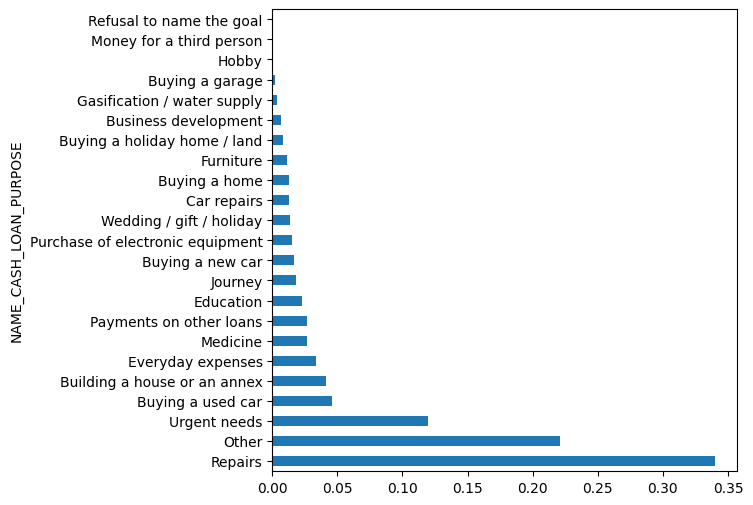

In [278]:
#univariate analysis on NAME_CASH_LOAN_PURPOSE
mergedf.NAME_CASH_LOAN_PURPOSE.value_counts(normalize= True).plot.barh()
plt.show()

- Most of the clients taking loans for Repairs.

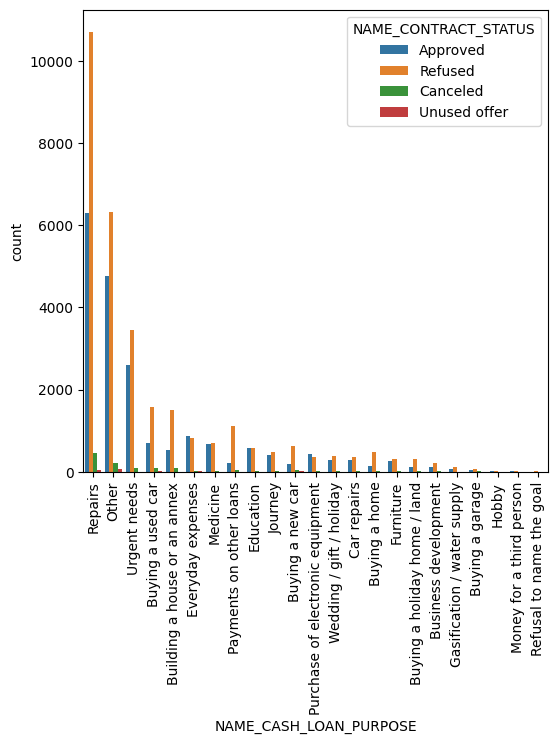

<Figure size 1500x3000 with 0 Axes>

In [279]:
#NAME_CASH_LOAN_PURPOSE x NAME_CONTRACT_STATUS
sns.countplot(data = mergedf, x= 'NAME_CASH_LOAN_PURPOSE', order=mergedf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.figure(figsize=(15,30))
plt.show()

- Education reason has equal chances of Approving and Refusing.
- Most applications got refused for the reason Repairs.
- Everyday expenses, Purchase of electronic equipment got more approvals than refusing.

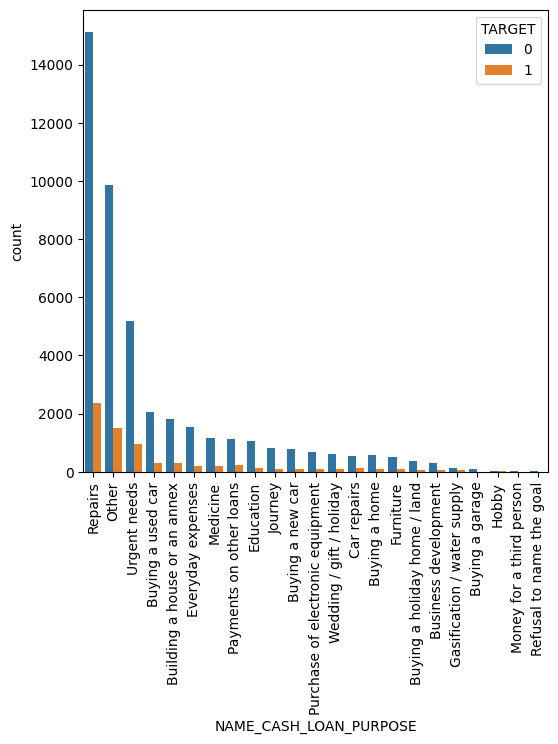

<Figure size 1500x3000 with 0 Axes>

In [280]:
#NAME_CASH_LOAN_PURPOSE x TARGET
sns.countplot(data = mergedf, x= 'NAME_CASH_LOAN_PURPOSE', order=mergedf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.xticks(rotation=90)
plt.figure(figsize=(15,30))
plt.show()

- Mostly all purposes has no payment difficulties.

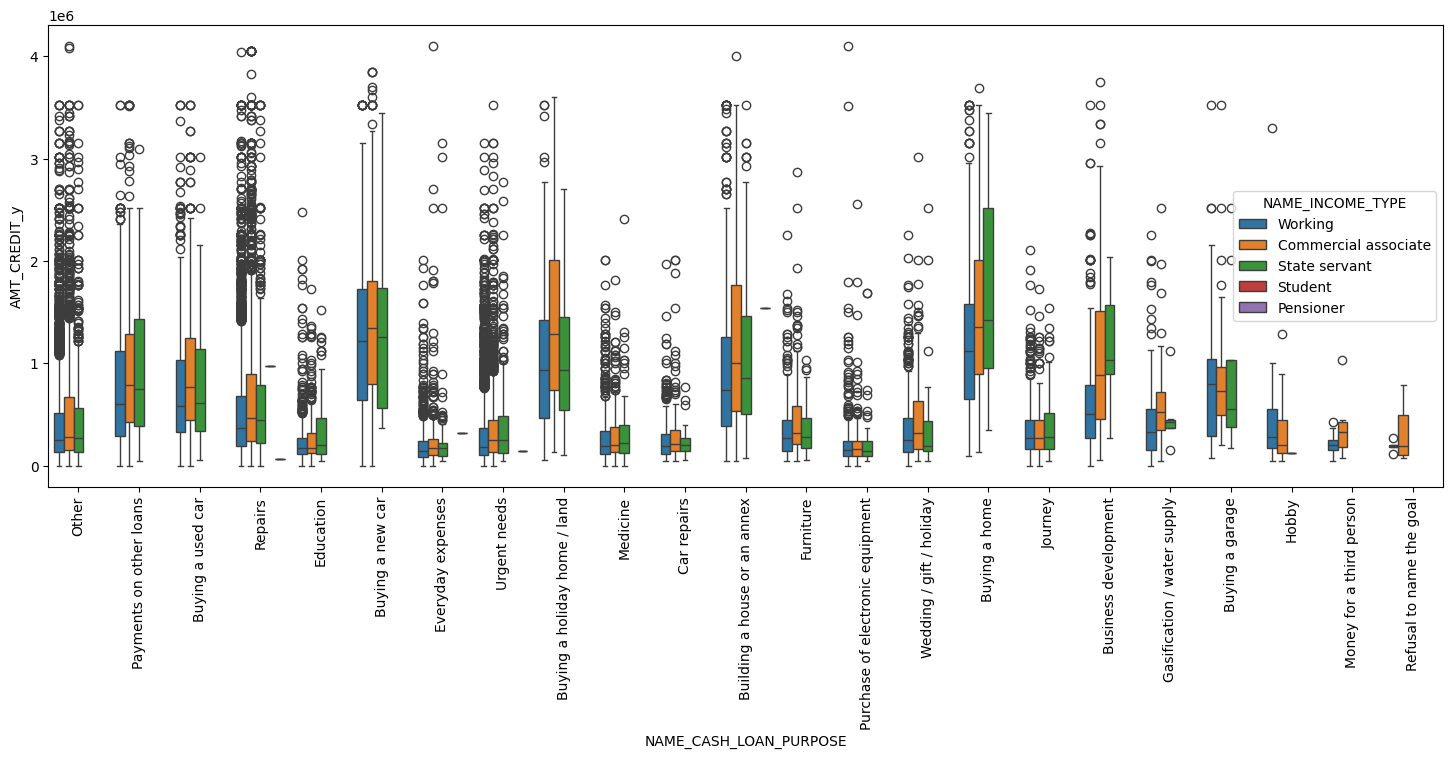

In [281]:
#NAME_CASH_LOAN_PURPOSE x  NAME_INCOME_TYPE x AMT_CREDIT_y
plt.figure(figsize=(18,6))
sns.boxplot(data =mergedf, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y')
plt.xticks(rotation=90)
plt.show()


- working clients have low credit amt.
- Commercial associate has high credit amt.
- Buying a new car, Buying a holiday home, Buying a house has high creadit amt.
- Hobby, Monry for a third person, Refusal to name the goal has low credit amt.

In [282]:
mergedf.CODE_GENDER.value_counts()

CODE_GENDER
F      32032
M      19380
XNA        1
Name: count, dtype: int64

In [283]:
#removing XNA record
mergedf=mergedf[mergedf.CODE_GENDER!='XNA']

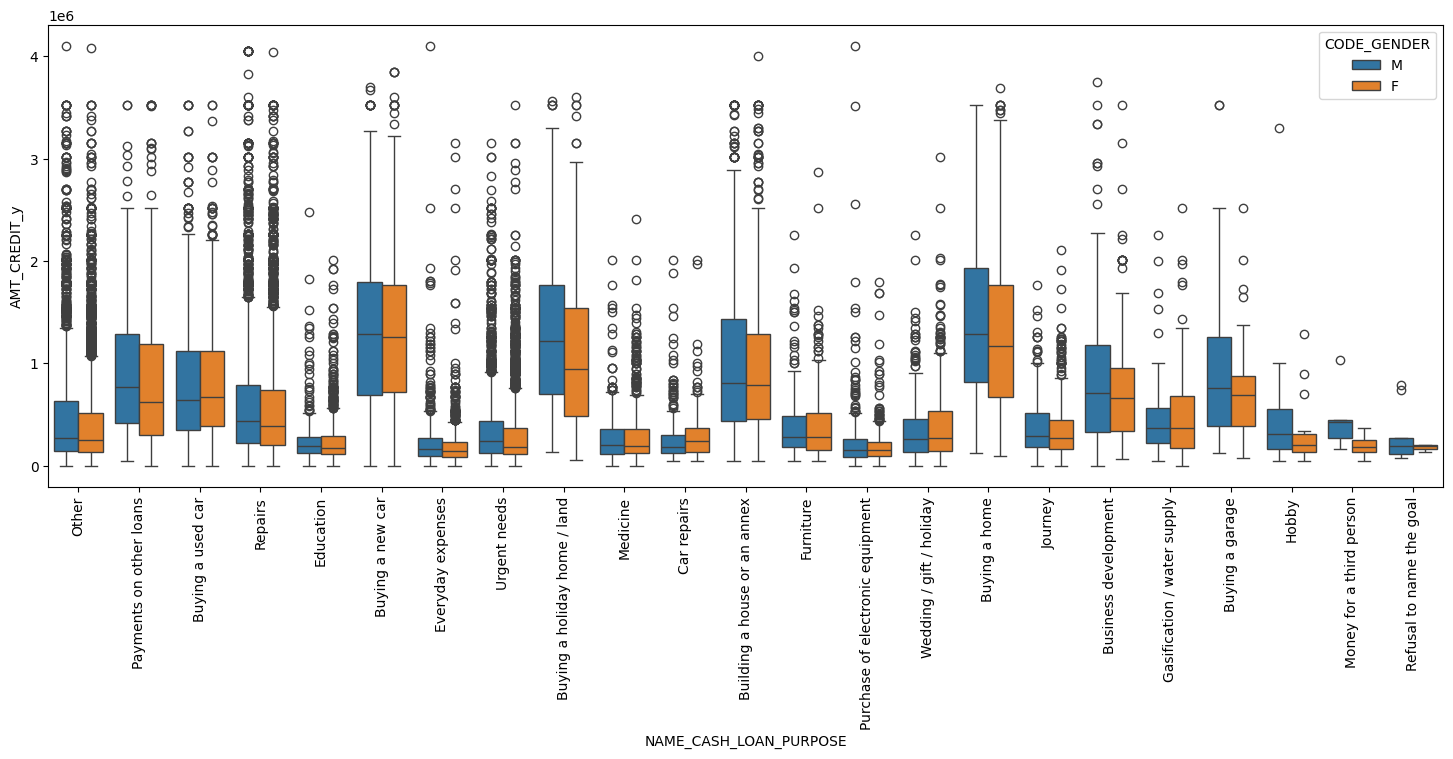

In [284]:
#NAME_CASH_LOAN_PURPOSE x  CODE_GENDER x AMT_CREDIT_y
plt.figure(figsize=(18,6))
sns.boxplot(data =mergedf, x='NAME_CASH_LOAN_PURPOSE',hue='CODE_GENDER',y='AMT_CREDIT_y')
plt.xticks(rotation=90)
plt.show()


- Men has more credit amt than women.
- For car repairs, furniture women have more credit amt

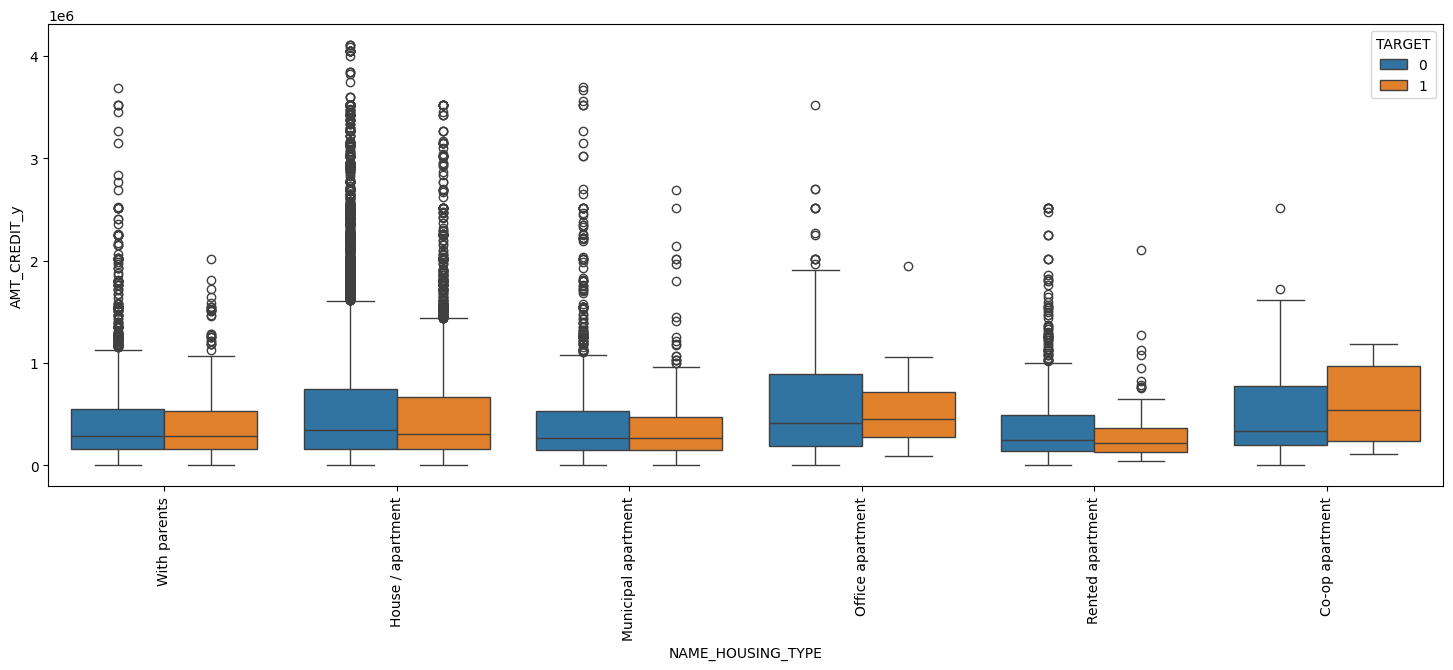

In [285]:
#NAME_HOUSING_TYPE x  AMT_CREDIT_y x TARGET
plt.figure(figsize=(18,6))
sns.boxplot(data =mergedf, x='NAME_HOUSING_TYPE',hue='TARGET',y='AMT_CREDIT_y')
plt.xticks(rotation=90)
plt.show()

- House/apartment, office apartment, rented apartment have high credit amt for target = 0.
- Co-op apartment has less credit amt for target = 0.


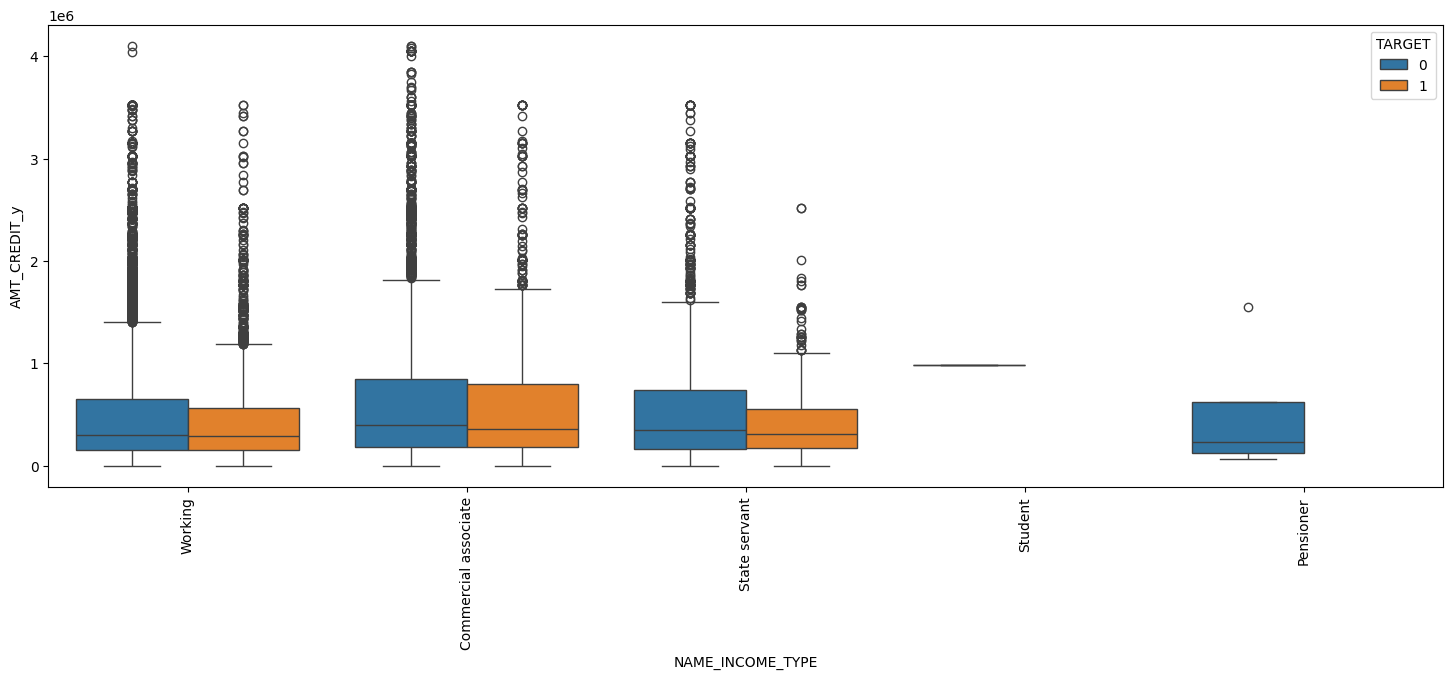

In [286]:
#NAME_INCOME_TYPE x  AMT_CREDIT_y x TARGET
plt.figure(figsize=(18,6))
sns.boxplot(data =mergedf, x='NAME_INCOME_TYPE',hue='TARGET',y='AMT_CREDIT_y')
plt.xticks(rotation=90)
plt.show()

- Pensioner has very have high credit amt for target = 0.

1. Bank should focus on giving loans to Pensioners.
2. Banks can try to avoid Co-op apartment clients, can focus on House/apartment, office apartment, rented apartment.
3. Males have comparitively little high credit amt than females.
4. Banks can avoid working clients and focus on Commercial associates.
5. Banks can focus on clients with pupose Buying a new car, Buying a holiday home, Buying a house and avoid Hobby, Monry for a third person, Refusal to name the goal.